# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 USD
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in 1000's USD


---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/boston_data.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [5]:
display(df.describe())
display(df.info())
display(df.isna().sum())
display(df.select_dtypes(include=np.number).columns)
display(df.select_dtypes(include=object).columns)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


None

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

Index([], dtype='object')

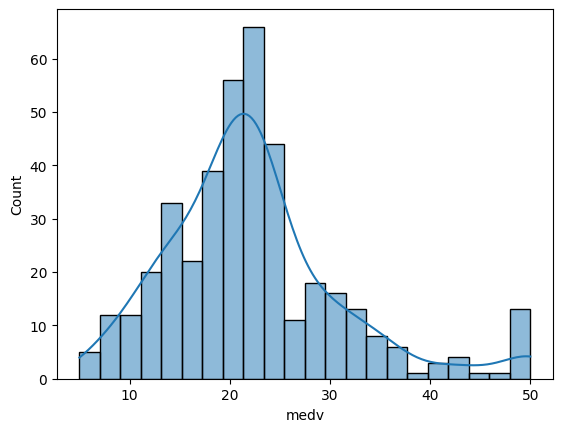

In [11]:
# distribution of target variable, and outliers
sns.histplot(df.medv, kde=True)
plt.show()

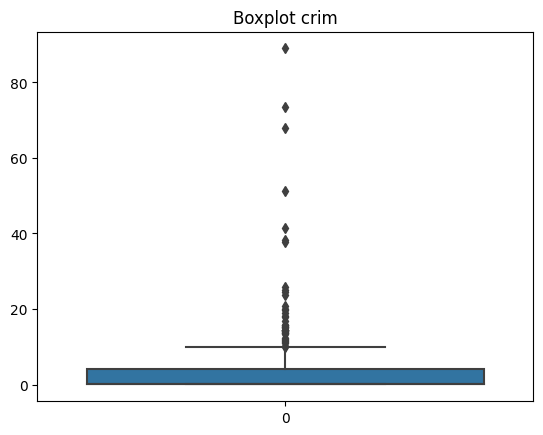

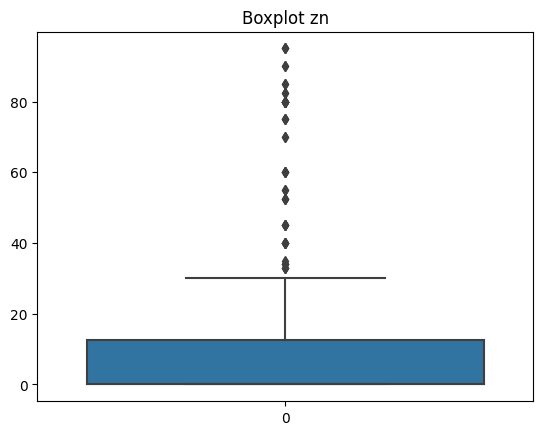

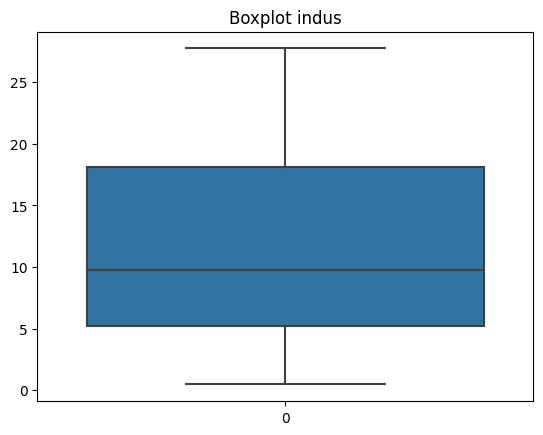

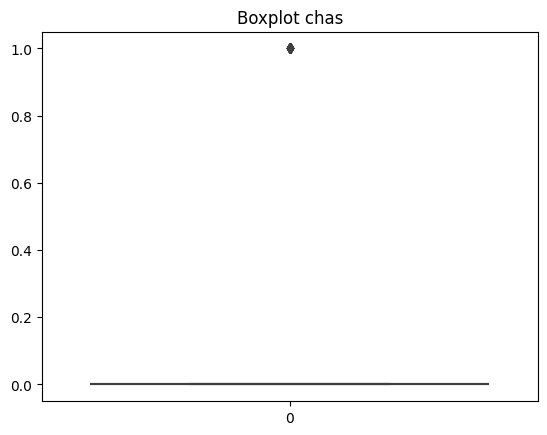

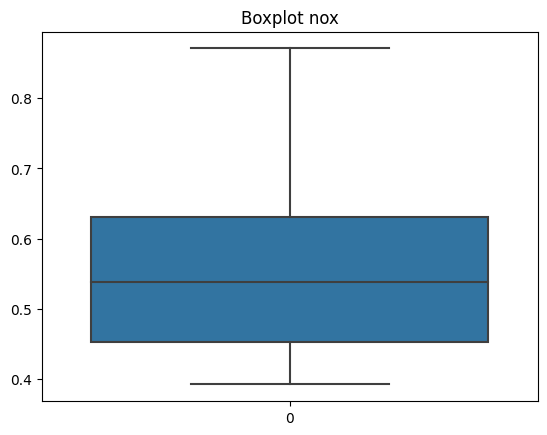

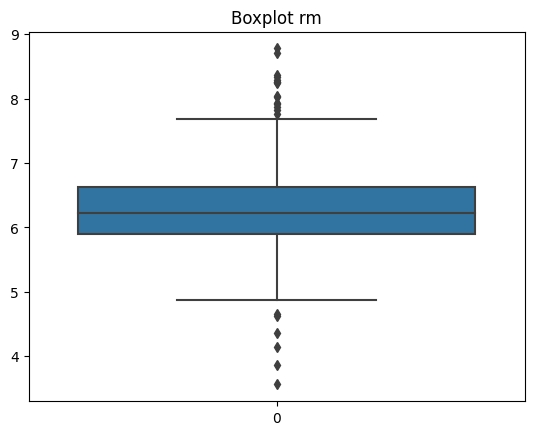

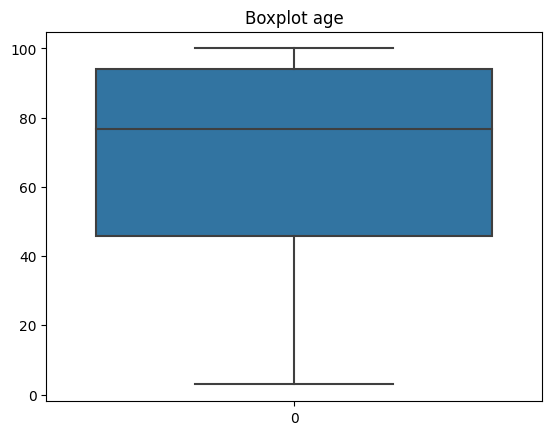

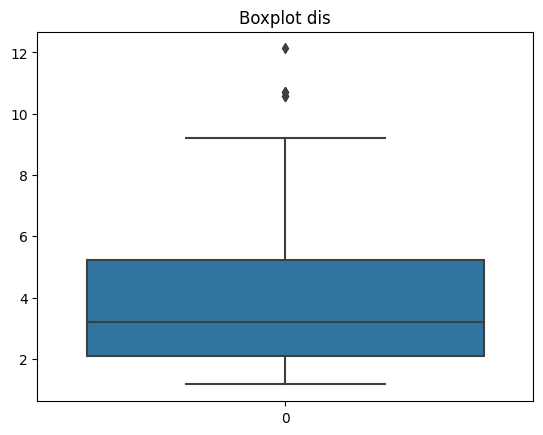

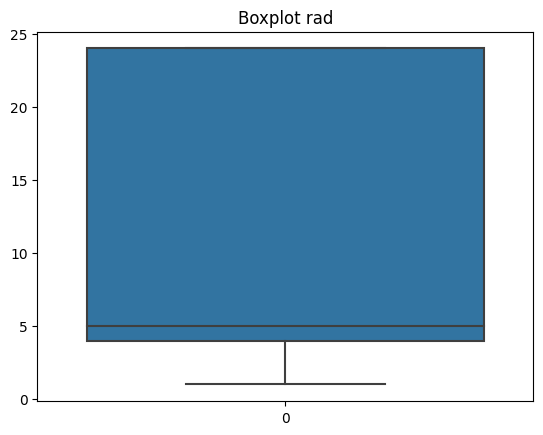

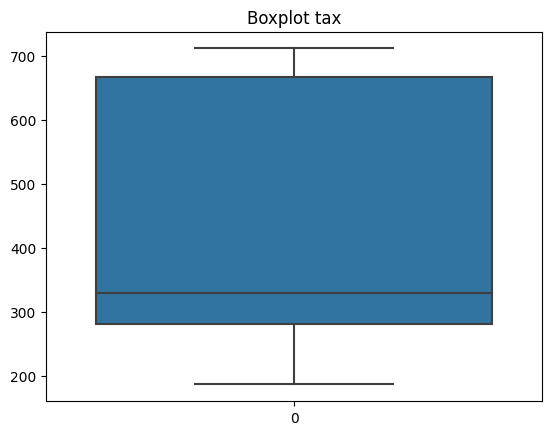

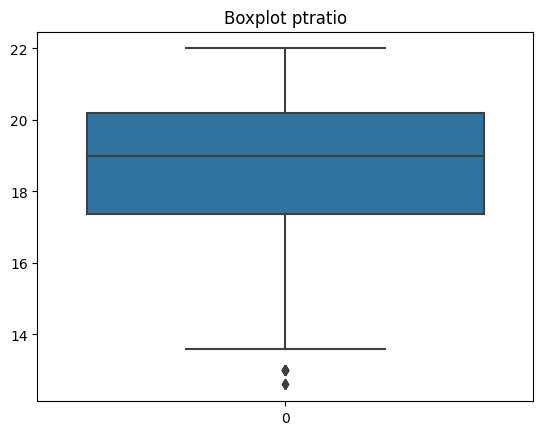

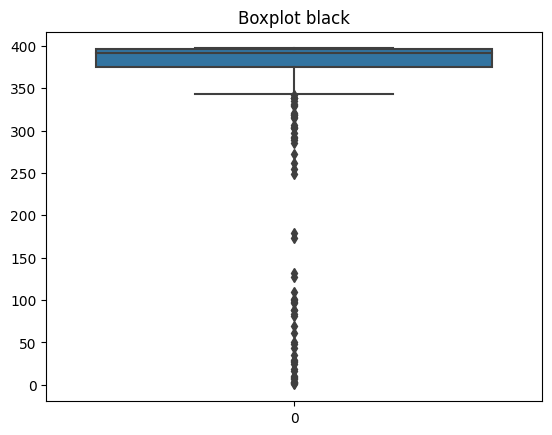

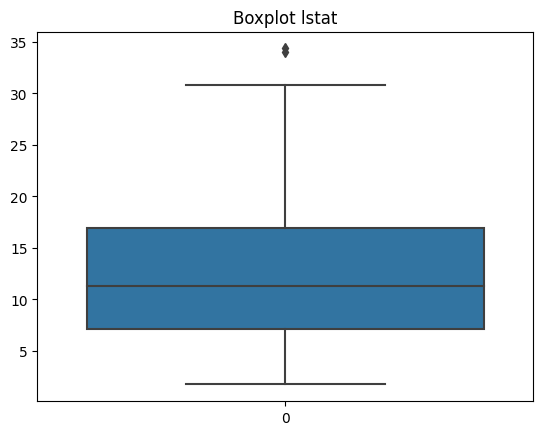

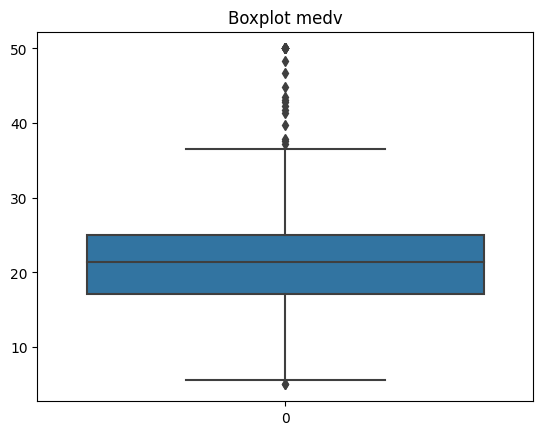

In [10]:
# check for outliers
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [13]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

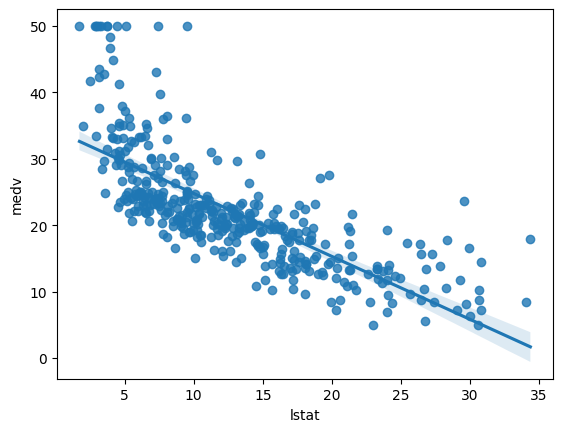

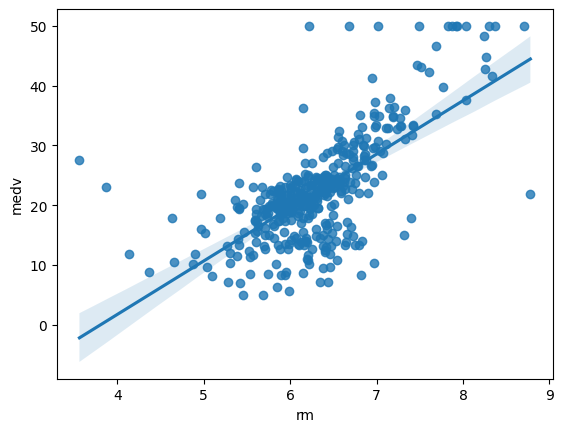

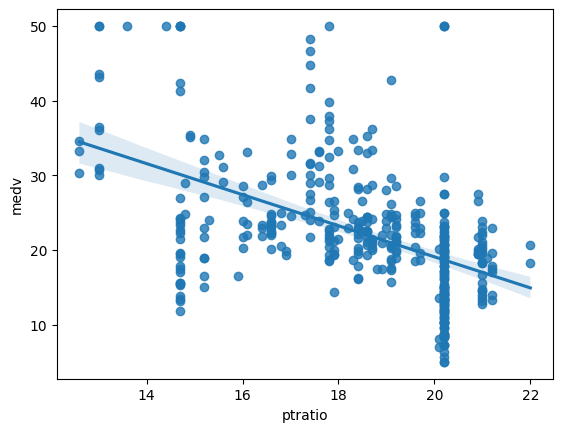

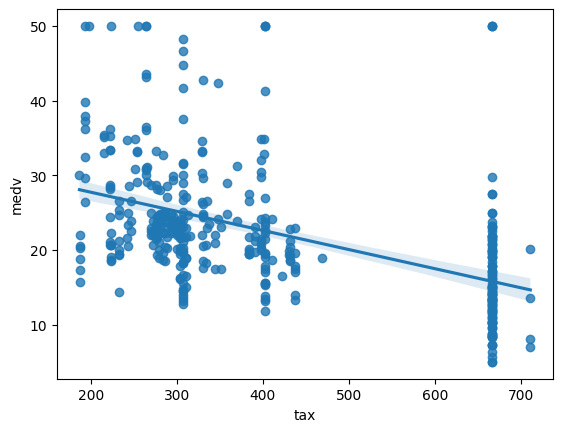

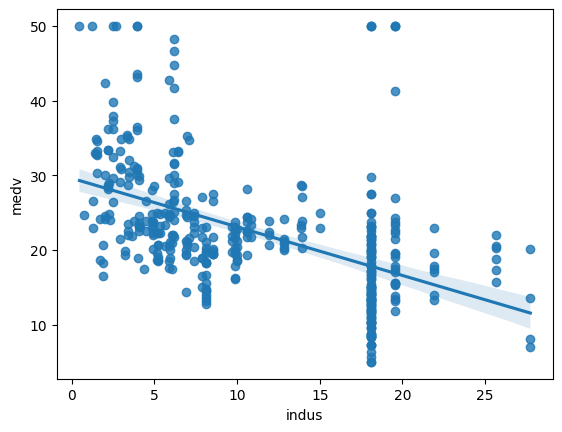

In [35]:
# Your plots here
sns.regplot(data=df, x='lstat', y='medv')
plt.show()
sns.regplot(data=df, x='rm', y='medv')
plt.show()
sns.regplot(data=df, x='ptratio', y='medv')
plt.show()
sns.regplot(data=df, x='tax', y='medv')
plt.show()
sns.regplot(data=df, x='indus', y='medv')
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [36]:
# Your response here

# - LSTAT: negative correlation, higher LSTAT lower MEDV
# - RM: positive correlation, more rooms, higher property value
# - PTRATIO: negative correlation, higher the ratio (less teachers) the lower the MEDV
# - TAX: weak negative correlation
# - INDUS: negative correlation, more 'industrial' sites, lower MEDV

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

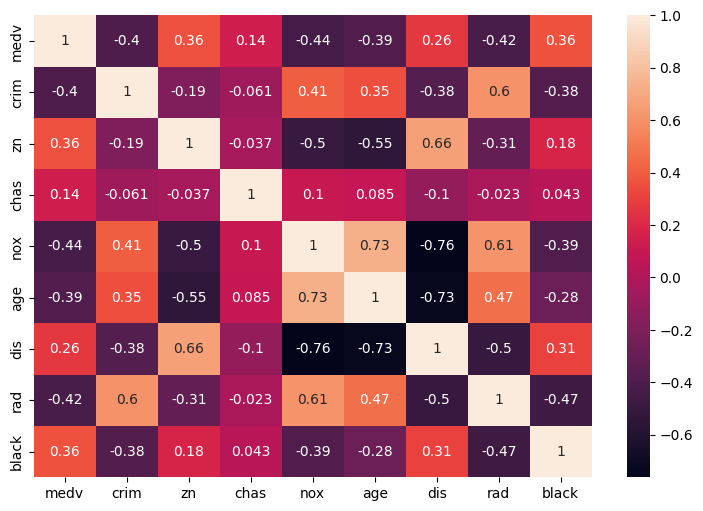

In [42]:
# Your response here

plt.figure(figsize=(9,6))
sns.heatmap(df[['medv', 'crim', 'zn', 'chas', 'nox', 'age', 'dis', 'rad', 'black']].corr(), annot=True)
plt.show()

In [43]:
# There is some weak correlation with NOX, RAD and CRIM
# Of these, CRIM I thought it would have had more correlation/impact on the MEDV

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [57]:
# Your code here
df[['medv']].describe().loc[['min','max','mean','50%','std']]

,medv
min,5.000000
max,50.000000
mean,22.312376
50%,21.400000
std,8.837019


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [61]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [63]:
# Your code here
from sklearn.model_selection import train_test_split

X = df.drop('medv', axis=1)
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [140]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

def RFRegressor(X_train, X_test, y_train, y_test, max_depth):
    res = {}
    model = RandomForestRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    score_of = model.score(X_train, y_train)
    deviation_of = score - score_of
    if abs(deviation_of) >= 0.05:
        is_of = True
    else:
        is_of = False
    y_pred = model.predict(X_test)
    r2_score = performance_metric(y_test, y_pred)
    
    res = {
        'model': 'Random Forest Regressor',
        'max_depth': f'{max_depth}',
        'score_test': f'{score:.6f}',
        'score_train': f'{score_of:.6f}',
        'deviation_of': f'{deviation_of:.6f}',
        'is_overfitting': f'{is_of}',
        'r2_score': f'{r2_score:.6f}'
    }
    
    return res


In [130]:
max_depths = [2,4,6,8]

results = []
for depth in max_depths:
    results.append(RFRegressor(X_train, X_test, y_train, y_test, depth))

results

[{'model': 'Random Forest Regressor',
  'max_depth': '2',
  'score_test': '0.660362',
  'score_train': '0.766330',
  'deviation_of': '-0.105968',
  'is_overfitting': 'True',
  'r2_score': '0.660362'},
 {'model': 'Random Forest Regressor',
  'max_depth': '4',
  'score_test': '0.693869',
  'score_train': '0.911839',
  'deviation_of': '-0.217970',
  'is_overfitting': 'True',
  'r2_score': '0.693869'},
 {'model': 'Random Forest Regressor',
  'max_depth': '6',
  'score_test': '0.687545',
  'score_train': '0.948642',
  'deviation_of': '-0.261097',
  'is_overfitting': 'True',
  'r2_score': '0.687545'},
 {'model': 'Random Forest Regressor',
  'max_depth': '8',
  'score_test': '0.723585',
  'score_train': '0.964554',
  'deviation_of': '-0.240968',
  'is_overfitting': 'True',
  'r2_score': '0.723585'}]

Now, plot the score for each tree on the training set and on the testing set.

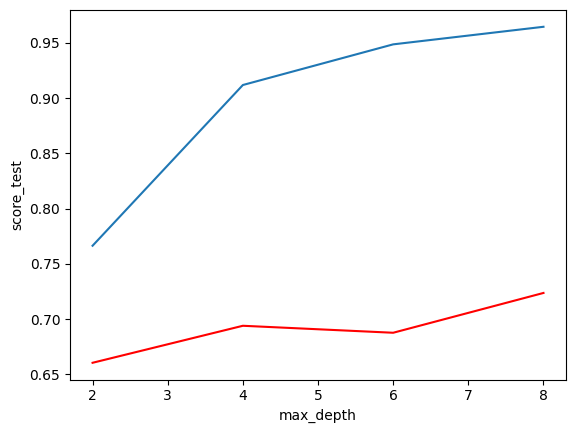

In [131]:
# Produce a plot with the score for the testing and training for the different max depths

tmp = pd.DataFrame()
for i in range(len(results)):
    tmp = pd.concat([tmp, pd.DataFrame.from_dict(results[i], orient='index').T], ignore_index=True)
# tmp

sns.lineplot(x=tmp['max_depth'].astype(int), y=tmp['score_test'].astype(float), color='red')
# plt.show()
sns.lineplot(x=tmp['max_depth'].astype(int), y=tmp['score_train'].astype(float))
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [132]:
# Your response here

# the higher the max_depth, the higher the test_score and the train_score, although
# it looks like the test_score increases faster than the test_score
# i.e. by increasing the max_depth it increases the accuracy of the model and reduces the overfitting 

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [133]:
# Your response here

for depth in (1,10):
    display(RFRegressor(X_train, X_test, y_train, y_test, depth))

{'model': 'Random Forest Regressor',
 'max_depth': '1',
 'score_test': '0.338334',
 'score_train': '0.575589',
 'deviation_of': '-0.237255',
 'is_overfitting': 'True',
 'r2_score': '0.338334'}

{'model': 'Random Forest Regressor',
 'max_depth': '10',
 'score_test': '0.717379',
 'score_train': '0.970876',
 'deviation_of': '-0.253497',
 'is_overfitting': 'True',
 'r2_score': '0.717379'}

In [134]:
# in both cases they have high variance and low bias

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [141]:
# Your response here
for depth in (None,5,25,50,100,500,1000):
    display(RFRegressor(X_train, X_test, y_train, y_test, depth))

# display(RFRegressor(X_train, X_test, y_train, y_test, max_depth=None))

{'model': 'Random Forest Regressor',
 'max_depth': 'None',
 'score_test': '0.719524',
 'score_train': '0.971472',
 'deviation_of': '-0.251948',
 'is_overfitting': 'True',
 'r2_score': '0.719524'}

{'model': 'Random Forest Regressor',
 'max_depth': '5',
 'score_test': '0.717326',
 'score_train': '0.935115',
 'deviation_of': '-0.217788',
 'is_overfitting': 'True',
 'r2_score': '0.717326'}

{'model': 'Random Forest Regressor',
 'max_depth': '25',
 'score_test': '0.700663',
 'score_train': '0.972754',
 'deviation_of': '-0.272091',
 'is_overfitting': 'True',
 'r2_score': '0.700663'}

{'model': 'Random Forest Regressor',
 'max_depth': '50',
 'score_test': '0.709672',
 'score_train': '0.969530',
 'deviation_of': '-0.259858',
 'is_overfitting': 'True',
 'r2_score': '0.709672'}

{'model': 'Random Forest Regressor',
 'max_depth': '100',
 'score_test': '0.667684',
 'score_train': '0.974598',
 'deviation_of': '-0.306914',
 'is_overfitting': 'True',
 'r2_score': '0.667684'}

{'model': 'Random Forest Regressor',
 'max_depth': '500',
 'score_test': '0.678004',
 'score_train': '0.972225',
 'deviation_of': '-0.294221',
 'is_overfitting': 'True',
 'r2_score': '0.678004'}

{'model': 'Random Forest Regressor',
 'max_depth': '1000',
 'score_test': '0.678393',
 'score_train': '0.971112',
 'deviation_of': '-0.292718',
 'is_overfitting': 'True',
 'r2_score': '0.678393'}

In [137]:
# It looks like it is always overfitting... the optimal max_depth should be around 50
# by tweaking with other parameters (i.e. n_estimators) it might be possible to get a better model

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here